In [1]:
#import des librairies pandas, matplotlib et numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [41]:
#import du csv contenant les valeurs des indicateurs par pays
data = pd.read_csv("EdStatsData.csv")
#import du csv contenant les descriptions des pays
country = pd.read_csv("EdStatsCountry.csv")

In [50]:
#on observe la structure du dataframe
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#on liste les colonnes dans le but de supprimer celles qui ne sont pas pertinentes
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [5]:
#on supprime deux colonnes que l'on ne juge pas utile pour l'analyse
data = data.drop(columns= ['Indicator Code','Unnamed: 69'])

In [6]:
#liste des indicateurs pertinents pour l'analyse
indicators = ["Enrolment in upper secondary education, both sexes (number)"
              ,"Enrolment in tertiary education, all programmes, both sexes (number)"
              ,"Internet users (per 100 people)"
              ,"Personal computers (per 100 people)"
              ,"GNI per capita, Atlas method (current US$)"
              ,"PASEC: Mean performance on the French language scale (100 points) for 5th grade students, total"]

#on liste ici les agrégats qui ne sont pas des pays (régions du monde, revenues, etc...)
country_aggregate = [country for country in country["Country Code"][country["Currency Unit"].isnull()]]

# df est le dataframe qui va nous permettre d'étudier les indicateurs séléctionnés
df = data[data['Indicator Name'].isin(indicators)]
#on ne garde que les pays pour notre étude et on supprime les agrégats
df = df[~df["Country Code"].isin(country_aggregate)]

On s'interesse dans cette partie aux indicateurs suivants :
- Nombre d’inscriptions dans l'enseignement secondaire supérieur (équivalent lycée)
- Nombre d’inscriptions dans l'enseignement supérieur (équivalent université)
- Utilisateurs d’internet (pour 100 personnes)

L'objectif est d'obtenir le **Nombre de lycéens et d’universitaires étant utilisateur d’internet**.

Enfin, on classe les pays selon cet indicateur.

In [7]:
#on crée le dataframe des deux premiers indicateurs
enrolment_2nd_3th = df[df["Indicator Name"].isin(indicators[:2])]

In [8]:
#les années après 2014 contiennent trop de valeurs nulles, on se concentre sur 2010 à 2014
enrolment_2nd_3th.loc[:,"2000":"2030"].count()

2000    272
2001    271
2002    282
2003    280
2004    291
2005    286
2006    279
2007    283
2008    286
2009    289
2010    289
2011    296
2012    292
2013    271
2014    241
2015    117
2016      7
2017      0
2020      0
2025      0
2030      0
dtype: int64

In [9]:
#on garde les valeurs entre 2010 et 2014
enrolment_2nd_3th = enrolment_2nd_3th[["Country Name","2010","2011","2012","2013","2014"]]
#on supprime les pays ayant des valeurs nulles pour 2014
enrolment_2nd_3th = enrolment_2nd_3th.dropna(subset=['2014'])
#On somme les lycéens et universitaires d'un même pays
enrolment_2nd_3th = enrolment_2nd_3th.groupby("Country Name").sum()
#on les classe par ordre alphabétique
enrolment_2nd_3th = enrolment_2nd_3th.sort_values(by=["Country Name"])

In [10]:
#on crée le dataframe "Internet users (per 100 people)"
internet_users = df[df["Indicator Name"].isin(indicators[2:3])]

In [11]:
#on vérifie qu'il y a assez de valeurs pour cet indicateur entre 2010 et 2014
internet_users.loc[:,"2000":"2030"].count()

2000    196
2001    197
2002    199
2003    193
2004    196
2005    198
2006    197
2007    204
2008    203
2009    202
2010    202
2011    204
2012    202
2013    201
2014    201
2015    201
2016    201
2017      0
2020      0
2025      0
2030      0
dtype: int64

In [12]:
#on garde les valeurs entre 2010 et 2014
internet_users = internet_users[["Country Name","2010","2011","2012","2013","2014"]]
#on supprime les pays ayant des valeurs nulles pour 2014
internet_users = internet_users.dropna(subset=['2014'])
#On garde seulement les pays qu'on a gardé dans enrolment_2nd_3th
internet_users = internet_users[internet_users["Country Name"].isin(enrolment_2nd_3th.index)]

#On passe la colonne "Country Name" en index
internet_users = internet_users.set_index("Country Name")
#on classe les pays par ordre alphabétique
internet_users = internet_users.sort_values(by=["Country Name"])

In [49]:
#on crée le dataframe nous donnant le nombre de lycéens et universitaires utilisateurs d'internet par pays
internet_users_2nd_3th = enrolment_2nd_3th*(internet_users/100)
internet_users_2nd_3th = internet_users_2nd_3th.sort_values(by=["2014"], ascending = False)
internet_users_2nd_3th.describe()

,2010,2011,2012,2013,2014
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,7.106457e+05,8.116492e+05,8.979006e+05,9.921014e+05,1.085231e+06
std,2.875435e+06,3.087114e+06,3.401634e+06,3.623874e+06,3.955804e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.242846e+02
25%,2.662676e+03,5.258060e+03,7.755416e+03,9.655390e+03,2.201964e+04
50%,7.045892e+04,1.052416e+05,1.186081e+05,1.317749e+05,1.548927e+05
75%,4.397023e+05,4.899758e+05,5.752008e+05,6.212378e+05,6.013403e+05
max,2.597879e+07,2.905145e+07,3.249076e+07,3.666497e+07,4.101841e+07


In [14]:
#nombre de pays si on en garde que 20%
Q3_internet_users_2nd_3th = int(internet_users_2nd_3th["2014"].count()*(20/100))
#on prend les 20% des premiers pays
top_internet_users_2nd_3th = internet_users_2nd_3th.head(Q3_internet_users_2nd_3th)
#on les trie par ordre décroissant de valeur sur 2014
top_internet_users_2nd_3th = top_internet_users_2nd_3th.sort_values(by=["2014"], ascending = False)

Text(0.5, 1.0, 'Classement des pays par nombre de lycéens et d’universitaires étant utilisateur d’internet (en 2014)')

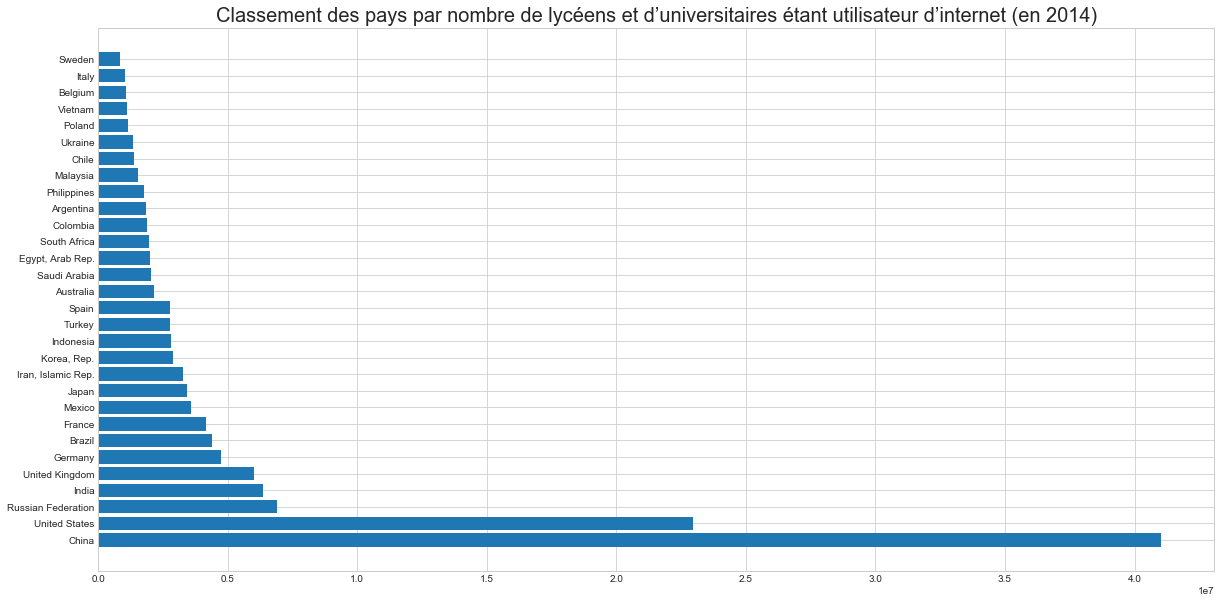

In [52]:
#on ajuste la taille du graph
fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

#on récupère les pays
x = top_internet_users_2nd_3th.index
#on récupère les valeurs de 2014
y = [i for i in top_internet_users_2nd_3th["2014"]]

#on inverse les axes pour avoir un classement des pays du haut vers le bas
ax.invert_yaxis()
plt.barh(x, y)
#on ajoute un titre au graph
plt.title("Classement des pays par nombre de lycéens et d’universitaires étant utilisateur d’internet (en 2014)",fontsize= 20)

Text(0.5, 1.0, 'Classement des pays par nombre de lycéens et d’universitaires étant utilisateur d’internet (en 2014)')

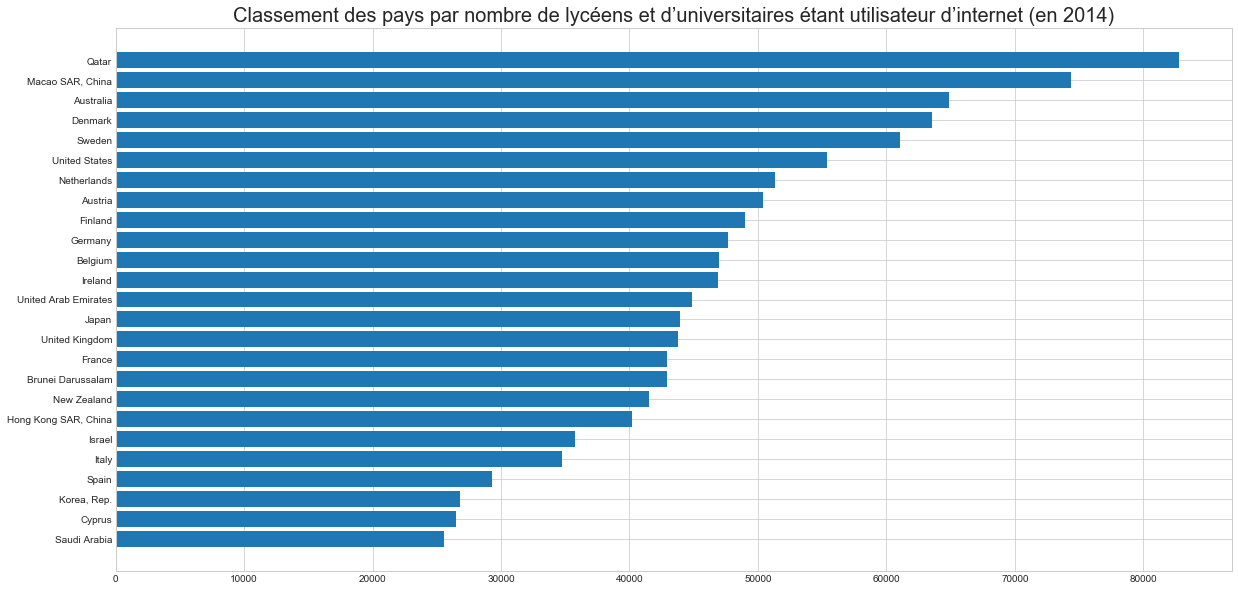

In [51]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes()
ax.invert_yaxis()

#on retire la Chine et les Etats Unis pour avoir plus de détails sur les autres pays
plt.barh(x[2:], y[2:])
plt.title("Classement des pays par nombre de lycéens et d’universitaires étant utilisateur d’internet (en 2014)",fontsize= 20)

On s'interesse dans cette partie à l'indicateur suivant :
- Ordinateurs personnels (pour 100 personnes)

L'objectif ici est de vérifier que l'indicateur comprend assez de valeur en 2014 pour les croiser avec les autres indicateurs.

In [17]:
#on crée le dataframe "Personal computers (per 100 people)"
personal_computers = df[df["Indicator Name"].isin(indicators[3:4])]

In [18]:
#Les données remontent à 2005 ce qui est moins pertinent
personal_computers.loc[:,"2000":"2030"].count()

2000    162
2001    182
2002    182
2003    179
2004    179
2005    171
2006     99
2007     48
2008     27
2009      3
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2020      0
2025      0
2030      0
dtype: int64

On s'interesse dans cette partie à l'indicateur suivant :
- RNB revenu national brut par habitant

L'objectif ici est de vérifier que l'indicateur comprend assez de valeur en 2014 pour les croiser avec les autres indicateurs.

In [19]:
#on crée le dataframe "RNB revenu national brut par habitant"
GNI = df[df["Indicator Name"].isin(indicators[-2:-1])]

In [20]:
#on vérifie qu'il y a assez de valeurs pour cet indicateur entre 2010 et 2014
GNI.loc[:,"2000":"2030"].count()

2000    185
2001    185
2002    189
2003    191
2004    193
2005    193
2006    194
2007    195
2008    192
2009    190
2010    190
2011    190
2012    189
2013    189
2014    184
2015    183
2016    178
2017      0
2020      0
2025      0
2030      0
dtype: int64

In [21]:
#on garde les valeurs entre 2010 et 2014
GNI = GNI[["Country Name","2010","2011","2012","2013","2014"]]
#on supprime les pays ayant des valeurs nulles
GNI = GNI.dropna()
#On garde seulement les pays qu'on a gardé dans enrolment_2nd_3th
GNI = GNI[GNI["Country Name"].isin(enrolment_2nd_3th.index)]

#On passe la colonne "Country Name" en index
GNI = GNI.set_index("Country Name")

In [22]:
GNI = GNI.sort_values(by=["2014"], ascending = False)
GNI.describe()

,2010,2011,2012,2013,2014
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,13339.928058,13852.733813,14501.870504,15138.561151,15229.064748
std,17710.018678,18205.943997,19084.237846,19982.602889,20034.571855
min,210.000000,230.000000,260.000000,280.000000,290.000000
25%,1555.000000,1715.000000,1870.000000,2005.000000,2075.000000
50%,5570.000000,6070.000000,6480.000000,6800.000000,6890.000000
75%,16490.000000,16435.000000,17225.000000,18190.000000,18450.000000
max,88440.000000,90280.000000,99100.000000,104190.000000,104860.000000


In [23]:
#nombre de pays si on en garde que 20%
Q3_GNI = int(GNI["2014"].count()*(20/100))
#on garde les 20% des pays ayant le plus grand RNB par habitant
top_GNI = GNI.head(Q3_GNI)
#on les trie par ordre décroissant de valeur sur 2014
top_GNI = top_GNI.sort_values(by=["2014"], ascending = False)

Text(0.5, 1.0, 'Classement des pays par revenu national brut\xa0(RNB) par habitant (en 2014)')

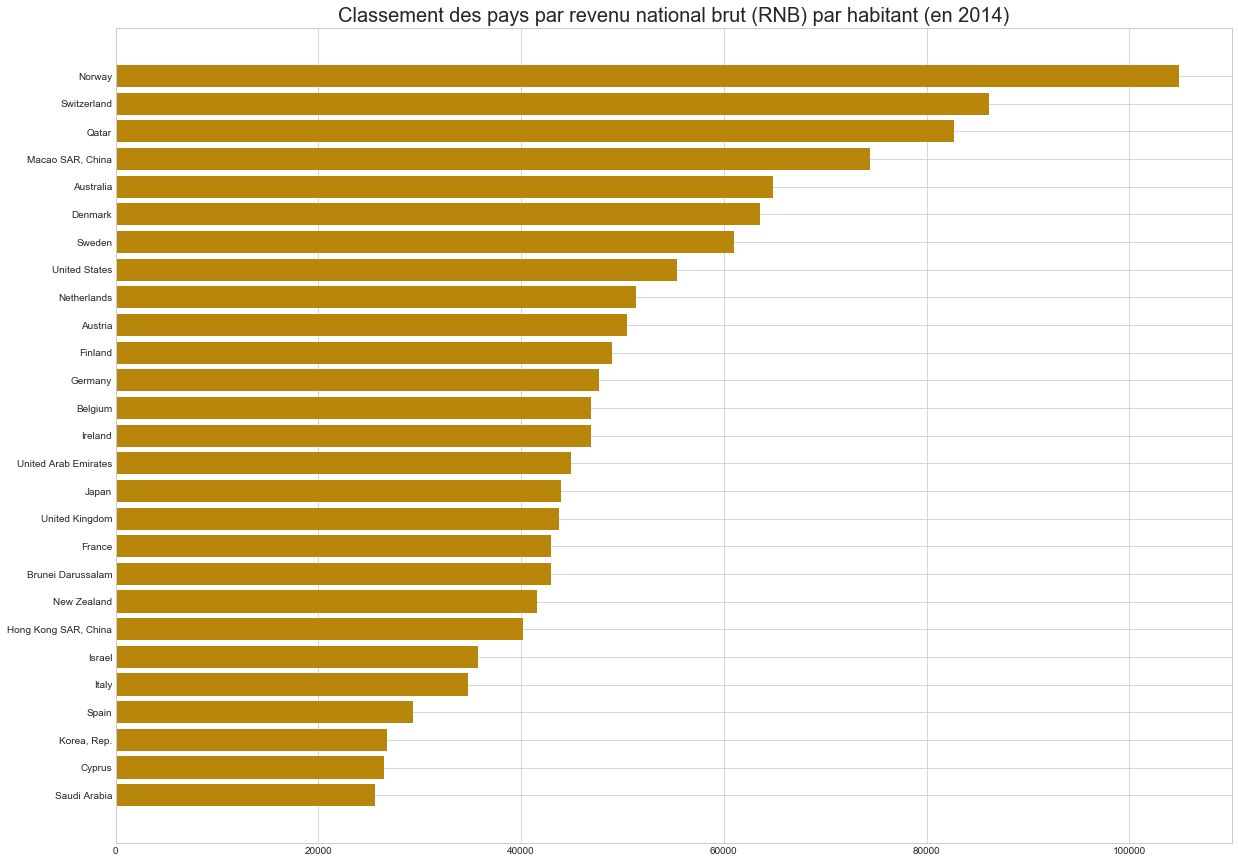

In [24]:
#on ajuste la taille du graph
fig = plt.figure(figsize=(20, 15))
ax = plt.axes()
#on récupère les pays
x = top_GNI.index
#on récupère les valeurs de 2014
y = [i for i in top_GNI["2014"]]

ax.invert_yaxis()
plt.barh(x, y, color='darkgoldenrod')
#on ajoute un titre au graph
plt.title("Classement des pays par revenu national brut (RNB) par habitant (en 2014)", size="20")

In [55]:
#on liste les pays que l'on considère comme à fort potentiel car dans top_internet_users_2nd_3th et top_GNI
liste_pays_fort_potentiel = top_internet_users_2nd_3th[top_internet_users_2nd_3th.index.isin(
    top_GNI.index)].sort_values(by="2014", ascending=False).index 
liste_pays_fort_potentiel

Index(['United States', 'United Kingdom', 'Germany', 'France', 'Japan',
       'Korea, Rep.', 'Spain', 'Australia', 'Saudi Arabia', 'Belgium', 'Italy',
       'Sweden'],
      dtype='object', name='Country Name')

In [56]:
#on repasse les index Country Name en colonne pour préparer la jointure
top_internet_users_2nd_3th_2014 = top_internet_users_2nd_3th.reset_index()
#on renomme la colonne 2014 car c'est la seule qu'on va garder pour la jointure
top_internet_users_2nd_3th_2014 = top_internet_users_2nd_3th_2014.rename(columns = {"2014":"Internet users 2nd & 3th"})

#on repasse les index Country Name en colonne pour préparer la jointure
top_GNI_2014 = top_GNI.reset_index()
#on renomme la colonne 2014 car c'est la seule qu'on va garder pour la jointure
top_GNI_2014 = top_GNI_2014.rename(columns = {"2014":"RNB"})

#on merge les deux dataframes
top_country = top_internet_users_2nd_3th_2014.merge(top_GNI_2014, left_on='Country Name', right_on='Country Name')
#on garde les 3 colonnes : Country Name, Internet users 2nd & 3th, RNB
top_country = top_country[["Country Name","Internet users 2nd & 3th", "RNB" ]].sort_values(
    by="Internet users 2nd & 3th", ascending= False)

#on arrondit et on garde la partie entière
top_country["Internet users 2nd & 3th"] = top_country["Internet users 2nd & 3th"].round(0).astype(int)
#on arrondit et on garde la partie entière
top_country["RNB"] = top_country["RNB"].round(0).astype(int)

top_country

,Country Name,Internet users 2nd & 3th,RNB
0,United States,22948671,55350
1,United Kingdom,5998636,43740
2,Germany,4733689,47710
3,France,4176811,42950
4,Japan,3441716,43940
5,"Korea, Rep.",2905404,26800
6,Spain,2776929,29300
7,Australia,2148454,64860
8,Saudi Arabia,2054881,25570
9,Belgium,1081475,46940


On s'interesse dans cette partie à l'indicateur suivant :
- Nombre de lycéens et d’universitaires étant utilisateur d’internet

L'objectif ici est calculer **l'évolution de l'indicateur entre 2010 et 2014**

Text(0.5, 1.0, 'Evolution du nombre de lycéens et d’universitaires étant utilisateur d’internet par pays')

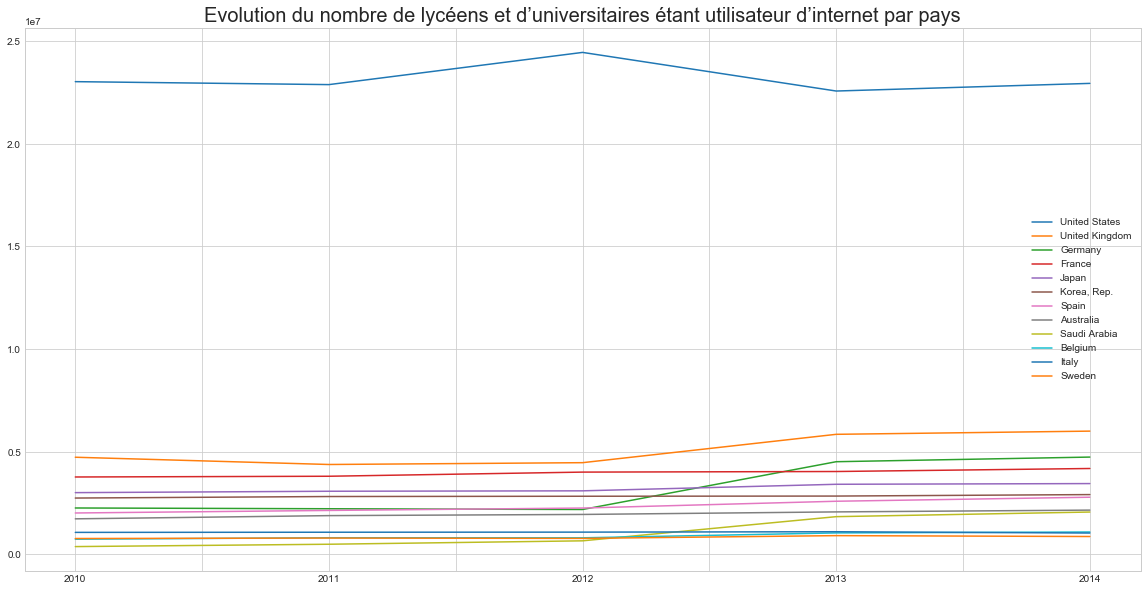

In [57]:
top_evolution_internet_users_2nd_3th = top_internet_users_2nd_3th[top_internet_users_2nd_3th.index.isin(
    liste_pays_fort_potentiel)]
top_evolution_internet_users_2nd_3th.T.plot(figsize=(20, 10))
plt.legend(loc='center right');
#on ajoute un titre au graph
plt.title("Evolution du nombre de lycéens et d’universitaires étant utilisateur d’internet par pays", size="20")

Text(0.5, 1.0, 'Evolution du nombre de lycéens et d’universitaires étant utilisateur d’internet par pays')

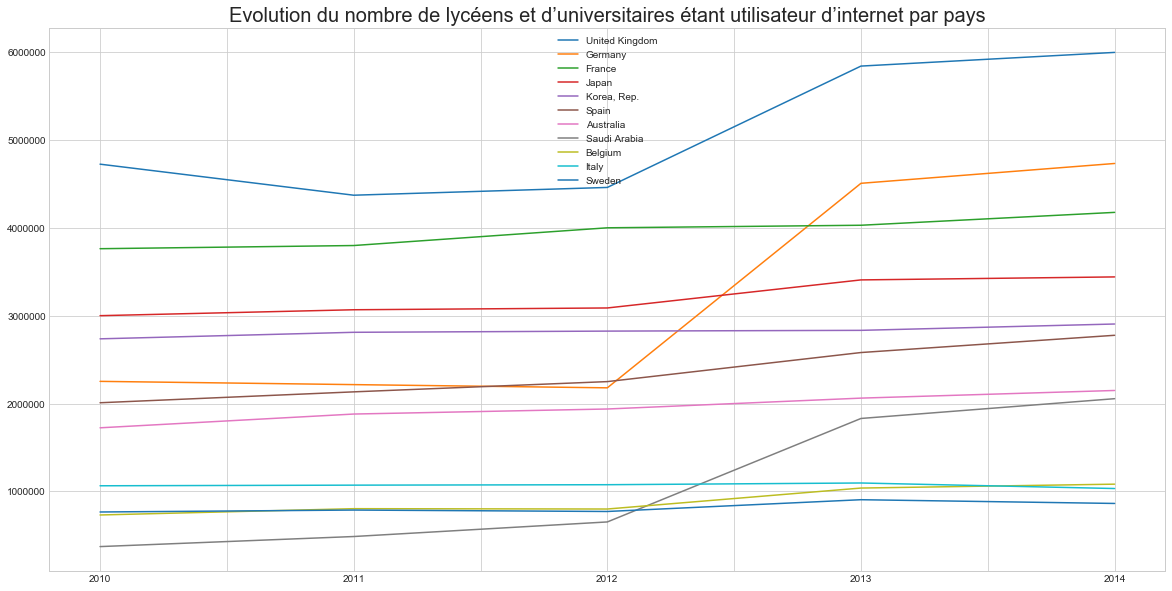

In [28]:
top_evolution_internet_users_2nd_3th.drop(["United States"]).T.plot(figsize=(20, 10))
plt.legend(loc='upper center');
plt.title("Evolution du nombre de lycéens et d’universitaires étant utilisateur d’internet par pays", size="20")

In [59]:
#on calcule l'évolution
top_evolution_internet_users_2nd_3th["Evolution"] = (
    (top_evolution_internet_users_2nd_3th["2014"]-top_evolution_internet_users_2nd_3th["2010"])
    /top_evolution_internet_users_2nd_3th["2010"])*100
#on les trie par ordre décroissant
top_evolution_internet_users_2nd_3th = top_evolution_internet_users_2nd_3th.sort_values(
    by=["Evolution"], ascending = False)

Text(0.5, 1.0, 'Pourcentage d’évolution du nombre de lycéens et d’universitaires étant utilisateur d’internet par pays (entre 2010 et 2014) ')

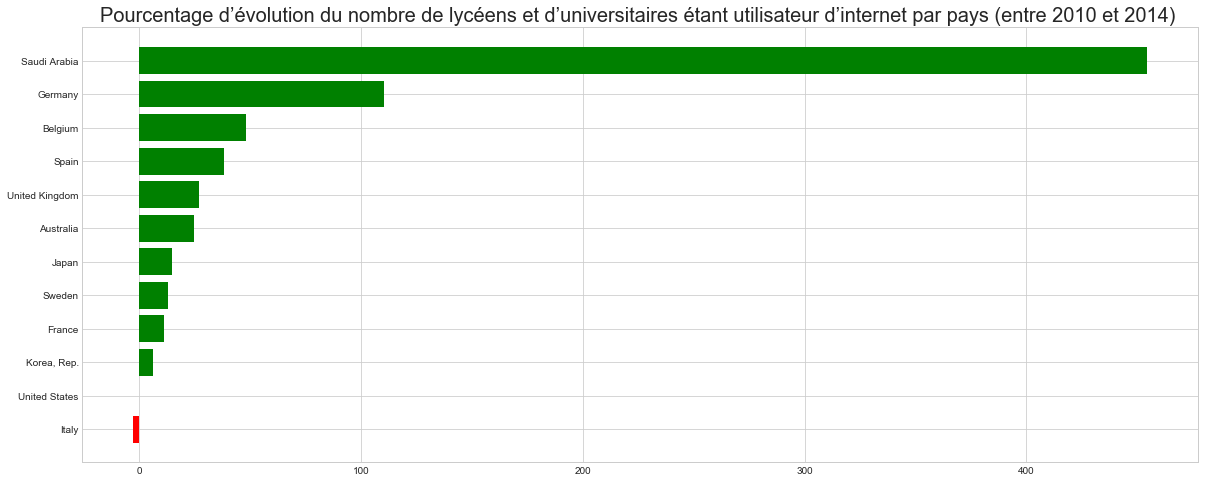

In [60]:
#on ajuste la taille du graph
fig = plt.figure(figsize=(20, 8))
ax = plt.axes()
#on récupère les pays
x2 = top_evolution_internet_users_2nd_3th.index
#on récupère l'evolution
y2 = [i for i in top_evolution_internet_users_2nd_3th["Evolution"]]

ax.invert_yaxis()
#on ajoute un code couleur à notre graph en fonction de la positivité ou la négativité du résultat
plt.barh(x2, y2, color=(pd.Series([i > 0 for i in y2])).map({True: 'g',False: 'r'}))
plt.title("Pourcentage d’évolution du nombre de lycéens et d’universitaires étant utilisateur d’internet par pays (entre 2010 et 2014) ", size="20")

Text(0.5, 1.0, 'Pourcentage d’évolution du nombre de lycéens et d’universitaires étant utilisateur d’internet par pays (entre 2010 et 2014) ')

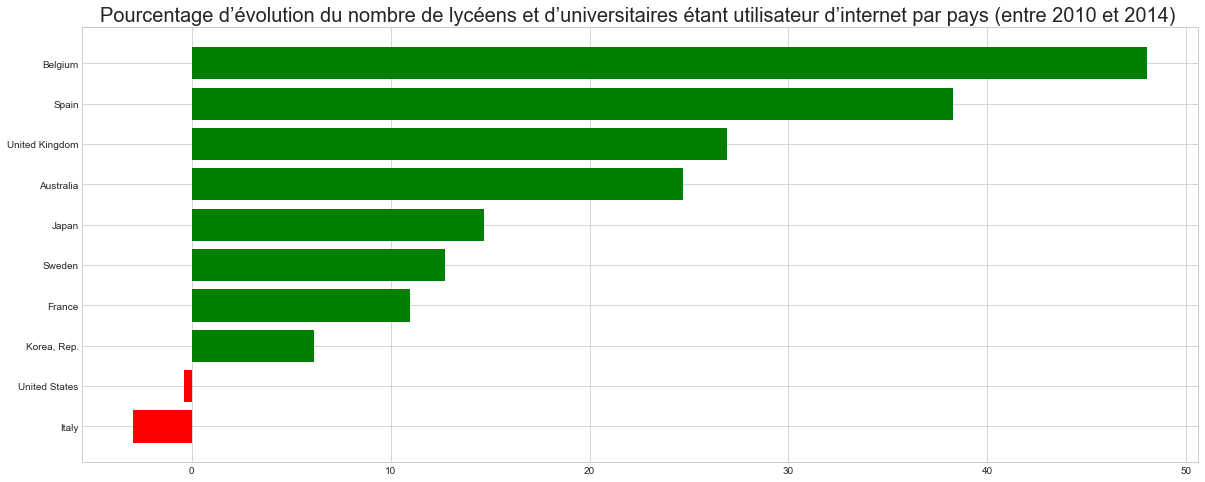

In [31]:
fig = plt.figure(figsize=(20, 8))
ax = plt.axes()
ax.invert_yaxis()
#on retire l'Arabie Saoudite
plt.barh(x2[2:], y2[2:], color=(pd.Series([i > 0 for i in y2[2:]])).map({True: 'g',False: 'r'}))
plt.title("Pourcentage d’évolution du nombre de lycéens et d’universitaires étant utilisateur d’internet par pays (entre 2010 et 2014) ", size="20") #on ajoute un titre au graph

On s'interesse dans cette partie à l'indicateur suivant :
- RNB revenu national brut par habitant

L'objectif ici est calculer **l'évolution de l'indicateur entre 2010 et 2014.**

Text(0.5, 1.0, 'Evolution du Revenu National Brut par habitant par pays (entre 2010 et 2014) ')

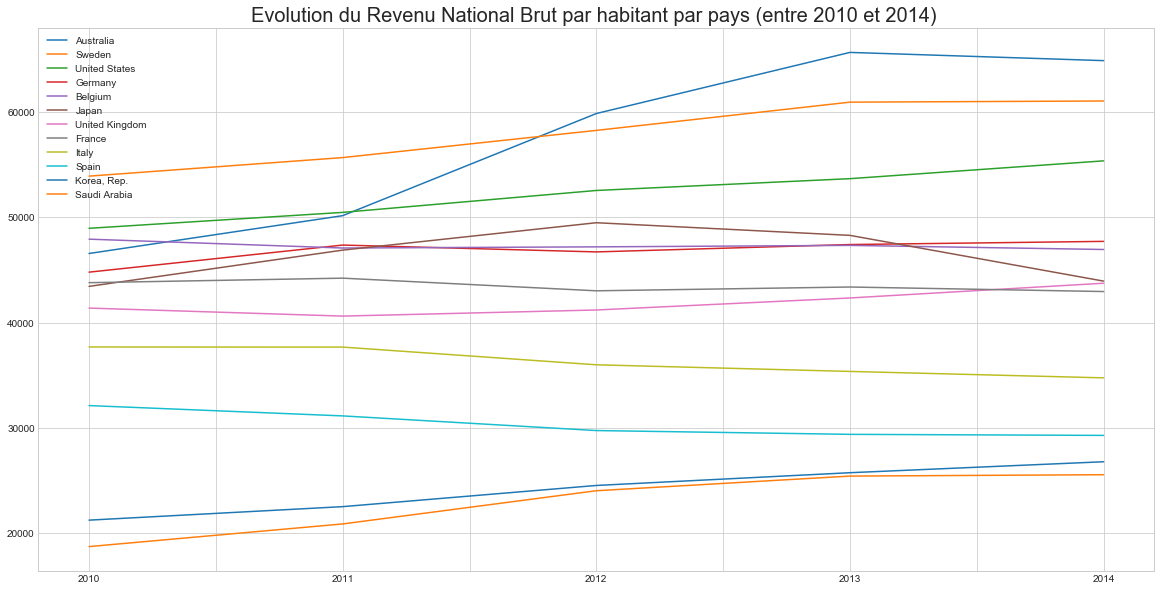

In [32]:
top_evolution_GNI = top_GNI[top_GNI.index.isin(liste_pays_fort_potentiel)]
top_evolution_GNI.T.plot(figsize=(20, 10))
plt.legend(loc='upper left');
#on ajoute un titre au graph
plt.title("Evolution du Revenu National Brut par habitant par pays (entre 2010 et 2014) ", size="20")

In [61]:
#on calcule l'évolution
top_evolution_GNI["Evolution GNI"] = ((top_evolution_GNI["2014"]-top_evolution_GNI["2010"])
                                      /top_evolution_GNI["2010"])*100
#on les trie par ordre décroissant
top_evolution_GNI = top_evolution_GNI.sort_values(by=["Evolution GNI"], ascending = False)

Text(0.5, 1.0, 'Pourcentage d’évolution du Revenu National Brut par habitant par pays (entre 2010 et 2014) ')

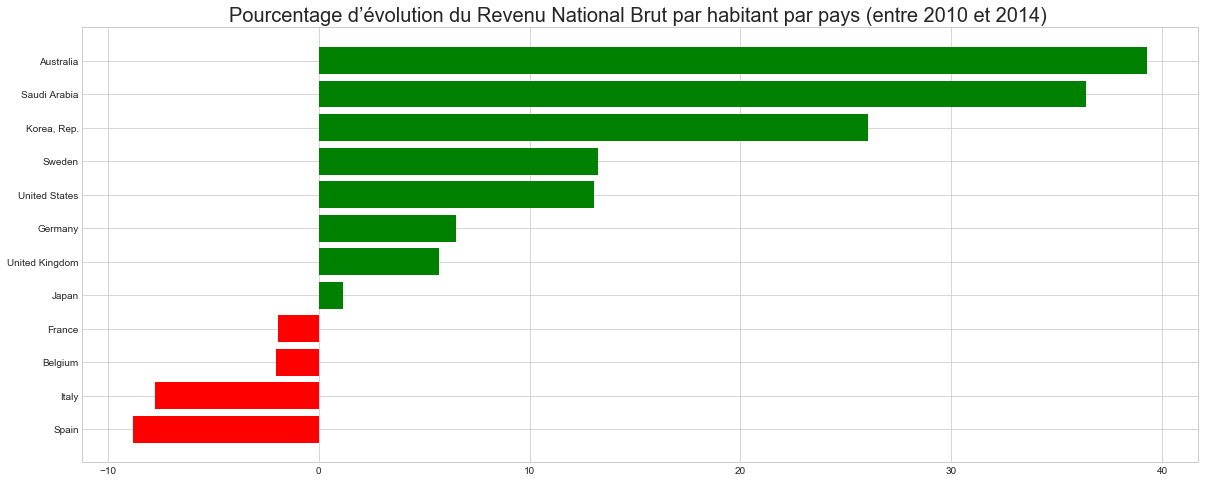

In [34]:
#on ajuste la taille du graph
fig = plt.figure(figsize=(20, 8))
ax = plt.axes()
#on récupère les pays
x2 = top_evolution_GNI.index
#on récupère l'evolution
y2 = [i for i in top_evolution_GNI["Evolution GNI"]]

ax.invert_yaxis()
plt.barh(x2, y2, color=(pd.Series([i > 0 for i in y2])).map({True: 'g',False: 'r'}))
#on ajoute un titre au graph
plt.title("Pourcentage d’évolution du Revenu National Brut par habitant par pays (entre 2010 et 2014) ", size="20")

In [35]:
#on remet l'index Country Name en colonne pout faciliter la jointure avec le dataframe evolution RNB
top_evolution_internet_users_2nd_3th = top_evolution_internet_users_2nd_3th.rename_axis('Country Name').reset_index()
#on remet l'index Country Name en colonne pout faciliter la jointure avec le dataframe evolution du nombre d'etudiants ayant accès à internet
top_evolution_GNI = top_evolution_GNI.rename_axis('Country Name').reset_index()
#on merge les deux dataframe en gardant seulement la colonne evolution de l'indicateur
top_evolution = pd.merge(top_evolution_internet_users_2nd_3th[["Country Name", "Evolution"]],top_evolution_GNI[["Country Name", "Evolution GNI"]])

In [36]:
#on arrondit les résultats pour qu'ils soient plus lisibles
top_evolution = round(top_evolution,1)
#on classe les résultats par ordre décroissant
top_evolution.sort_values(by=["Evolution","Evolution GNI"], ascending = False)

,Country Name,Evolution,Evolution GNI
0,Saudi Arabia,454.7,36.4
1,Germany,110.2,6.5
2,Belgium,48.0,-2.0
3,Spain,38.2,-8.8
4,United Kingdom,26.9,5.7
5,Australia,24.7,39.3
6,Japan,14.7,1.2
7,Sweden,12.7,13.2
8,France,11.0,-1.9
9,"Korea, Rep.",6.2,26.1


In [37]:
french_performance = df[df["Indicator Name"].isin(indicators[-1:])] #on crée le dataframe "Internet users (per 100 people)"

In [38]:
french_performance.loc[:,"2000":"2030"].count() #il n'y a quasiment aucune données pour cette indicateur

2000    0
2001    0
2002    0
2003    0
2004    1
2005    3
2006    1
2007    2
2008    0
2009    4
2010    3
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2020    0
2025    0
2030    0
dtype: int64